# **Telecom Customer Churn Analysis**
  
 ## Final Project - Data Analytics



## **TASK 1: Problem Definition & Dataset Selection**


### **1.Introduction**

#### **1.1 Background**

Customer churn refers to customers discontinuing a service. In the telecom industry, churn directly impacts revenue and long-term growth. Understanding churn drivers helps companies design effective retention strategies.


#### **1.2 Problem Statement**

Telecom companies face significant revenue loss due to customer churn. Without understanding customer behavior, pricing sensitivity, and service usage patterns, it becomes difficult to reduce churn.


#### **1.3 Aim of the Project**

To analyze telecom customer data and identify key factors influencing customer churn using exploratory data analysis.

#### **1.4 Objectives**

-To clean and preprocess telecom customer data

-To perform exploratory data analysis (EDA)

-To visualize churn-related trends

-To derive key business insights

-To provide actionable recommendations

### **2. Dataset Description**

#### **2.1 Dataset Source**

The dataset used is the Telco Customer Churn Dataset obtained from Kaggle.

#### **2.2 Dataset Size**

Rows: 7,043

Columns: 21

#### **2.3 Feature Overview**

The dataset includes customer demographics, service subscriptions, contract details, billing information, and churn status.

### **3. Data Loading & Initial Inspection**

#### **3.1 Importing Required Libraries**

This step involves importing the required Python libraries used for data manipulation and numerical analysis.

- **`Pandas`** is a Python library used for data manipulation and analysis.

  Used to load the dataset, inspect its structure, clean missing and inconsistent values, transform data types, create derived features, and prepare the dataset for exploratory data analysis.

- **`NumPy`** is a Python library designed for efficient numerical computation.

  Used to support numerical data handling and transformations, and it also served as the underlying framework for many Pandas operations.

In [ ]:
import pandas as pd
import numpy as np


#### **3.2 Loading the Dataset**

The raw telecom customer dataset is loaded from Google Drive using the Pandas library.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
os.listdir('/content/drive/MyDrive/ASSIGNMENTS')     # to check available files and folders and avoid file path errors.



['SOFT SKILLS', 'CORE', 'Telco_Churn_Project']

In [ ]:
os.listdir('/content/drive/MyDrive/ASSIGNMENTS/Telco_Churn_Project')

['WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'telco_cleaned.csv',
 'Telco_Customer_Churn_Analysis.ipynb']

In [ ]:
# Loading the Dataset

import pandas as pd

raw_path = '/content/drive/MyDrive/ASSIGNMENTS/Telco_Churn_Project/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(raw_path)      # Loaded the telecom dataset using read_csv()

df.head() # inspected the data




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Dataset Inspection

print("Shape (rows, columns):", df.shape)
df.info()
df.describe(include='all').T
df.isnull().sum()
df.duplicated().sum()


Shape (rows, columns): (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperles

np.int64(0)

#### **3.3 Initial Data Overview**

After loading the dataset, an initial overview is performed to understand its size, structure, data types, and statistical properties.
This step helps identify potential data quality issues and guides further preprocessing decisions.

The following checks are performed:

- Shape of the dataset (rows and columns)

- Column names and data types

- Summary statistics for numerical and categorical variables

#### **3.4 Initial Observations**

##### **3.4.1 Initial Dataset Summary**

- Number of Records (Rows): 7,043

- Number of Features (Columns): 21

##### **3.4.2 Dataset Structure**

- The dataset is stored as a Pandas DataFrame

- Index ranges from 0 to 7042, indicating 7,043 customer records

- The dataset occupies approximately 1.1 MB of memory

##### **3.4.3 Data Types Distribution**

- Categorical (object): 18 columns

- Integer (int64): 2 columns (`SeniorCitizen`, `tenure`)

- Numeric (float64): 1 column (`MonthlyCharges`)

##### **3.4.4 Data Completeness**

- All columns contain 7,043 non-null values

- No missing values are present in the dataset

##### **3.4.5 Important Observation**

- The `TotalCharges` column is stored as object (text) instead of numeric

- This requires data type conversion during preprocessing

##### **3.4.6 Missing Value Check**

- `df.isnull().sum()` - used to count Total missing values in the dataset

- Total missing values in the dataset: 0



## **TASK 2: Data Cleaning & Pre-processing**

In this task, we prepare and clean the Telco Customer Churn dataset for Exploratory Data Analysis (EDA).  
This includes:
- Handling missing values  
- Removing duplicates  
- Correcting data types  
- Standardizing column names  
- Creating derived features  
- Saving the cleaned dataset  


### 4. **Data Cleaning & Preprocessing**

#### **4.1 Overview of Data Cleaning Process**

Data cleaning and preprocessing are essential steps to ensure data quality and reliability before analysis.
In this task, the dataset is cleaned by handling missing values, correcting data types, removing inconsistencies, and creating derived features to support exploratory data analysis.

#### **4.2 Creating a Copy of the Dataset**

A copy of the original dataset is created to preserve the raw data and perform all cleaning operations on a separate dataset.

In [ ]:
clean = df.copy()


#### **4.3 Standardizing Column Names**

Column names are standardized by removing spaces, converting them to lowercase, and replacing spaces with underscores.
This improves consistency and makes column names easier to reference during analysis.


- `str.strip()` → removes leading/trailing spaces in column names

- `str.replace(' ', '_')` → replaces spaces with underscores

- ` str.lower()` → converts column names to lowercase



In [ ]:
# Standardize column names
clean.columns = clean.columns.str.strip().str.replace(' ', '_').str.lower()

#### **4.4 Handling Incorrect Data Types and Missing Values**

##### **4.4.1 Converting Numeric Columns**

Some numeric columns are stored as text. These columns are converted to numeric data types.
Invalid or missing values are coerced into NaN for further handling.

In [ ]:
# Fix TotalCharges (convert to numeric)

clean['totalcharges'] = pd.to_numeric(clean['totalcharges'], errors='coerce')

clean['monthlycharges'] = pd.to_numeric(clean['monthlycharges'], errors='coerce') # Converted again for consistency and safety
clean['tenure'] = pd.to_numeric(clean['tenure'], errors='coerce')  # Converted to ensure correct data type


#  errors = coerce -> force the conversion, and if it fails, replace the value with NaN instead of throwing an error.”


##### **4.4.2 Handling Missing Values in TotalCharges**

Missing values in the `TotalCharges` column occur primarily for customers with very low or zero tenure.
These missing values are logically filled using the formula:

- `TotalCharges` = `MonthlyCharges` × `Tenure`

- Replaces remaining missing values with 0

In [ ]:
# Fill missing TotalCharges
mask = clean['totalcharges'].isnull()
clean.loc[mask, 'totalcharges'] = (clean.loc[mask, 'monthlycharges'] * clean.loc[mask, 'tenure']).fillna(0)


#### **4.5 Handling Categorical Variables**

The `SeniorCitizen` column is converted from numeric values (0 and 1) into categorical labels (Yes and No) to improve readability and interpretability.

In [ ]:
# Convert SeniorCitizen to Yes/No
clean['seniorcitizen'] = clean['seniorcitizen'].map({0:'No', 1:'Yes'})


#### **4.6 Removing Duplicate Records and Cleaning Text Data**

##### **4.6.1 Removing Duplicate Records**

Duplicate records are removed to avoid biased analysis and ensure data accuracy.

In [ ]:
# Remove duplicates
clean = clean.drop_duplicates()

##### **4.6.2 Cleaning Categorical Text Values**

Leading and trailing whitespaces are removed from all categorical columns to ensure consistency during grouping and visualization.  

- Identifies all text (object) columns

- Removes unwanted spaces from values

In [ ]:
# Strip whitespace from object columns
for col in clean.select_dtypes(include='object').columns:
    clean[col] = clean[col].str.strip()

### **4.7 Feature Engineering (Derived Columns)**

- Additional features are created from existing data to enhance the analytical depth of the dataset.

- `tenure_years`: Converts tenure from months to years and rounds the value to 2 decimal places

- `churn_flag`: Converts churn status into a binary numeric format

  Yes → 1 (customer churned)

  No → 0 (customer retained)

In [ ]:
# tenure in years

clean['tenure_years'] = (clean['tenure'] / 12).round(2)

# churn_flag (Yes=1,No=0)

clean['churn_flag'] = clean['churn'].map({'Yes':1, 'No':0})

### **4.8 Feature Engineering – Service Count**

To enhance the analysis, a new derived feature called `total_services` is created.
This feature represents the total number of telecom services subscribed by each customer.

The service count is calculated by checking multiple service-related columns and incrementing the count for each subscribed service. This feature helps analyze the relationship between service usage intensity and customer churn.

In [ ]:
# count number of subscribed services
service_cols = ['phoneservice','multiplelines','internetservice','onlinesecurity','onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies']
                                                                             # Defines all service-related columns.

def count_services(row):
    count = 0
    for col in service_cols:
        value = str(row[col]).lower()                                        # Processes one customer at a time.
        if value == 'yes':
            count += 1                               # Counts services marked as “Yes”.
        elif col == 'internet_service' and value not in ['no', 'nan']:
            count += 1                               # Special handling for internet service
    return count

clean['total_services'] = clean.apply(count_services, axis=1) # Creates a new column containing the total service count per customer.

clean.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_years,churn_flag,total_services
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.08,0,1
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,2.83,0,3
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.17,1,3
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3.75,0,3
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.17,1,1


#### **4.8 Final Cleaned Dataset Validation**

After completing all data cleaning and preprocessing steps, a final validation is performed to ensure that the dataset is fully prepared for exploratory data analysis.
This validation confirms correct data types and verifies the absence of missing values.

In [ ]:
# Final Cleaned Dataset Check

clean.info()
clean.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   object 
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


,0
customerid,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0


#### **4.8.1 Data Cleaning Summary**

- All non-numeric values in `TotalCharges` were handled.
- Missing values filled appropriately.
- Column names standardized to snake_case.
- `SeniorCitizen` converted to categorical Yes/No.
- Derived features created:
  * `tenure_years`  
  * `churn_flag`  
  * `total_services`  

#### **4.8.2 Column-by-column understanding**


- `customerid` – unique customer identifier

- `gender`, `partner`, `dependents` – demographic details

- `phoneservice`, `internetservice`, `streamingtv`, etc. – service subscriptions

- `contract`, `paymentmethod`, `paperlessbilling` – contract & billing info

- `monthlycharges`, `totalcharges` – billing amounts

- `churn` – churn status (Yes/No)





- The dataset is now ready for EDA.


#### **4.9 Saving the Cleaned Dataset**

After completing all data cleaning, preprocessing, and feature engineering steps,
the cleaned dataset is saved to Google Drive. This ensures data persistence and
allows the cleaned data to be reused for exploratory data analysis, SQL queries,
and dashboard creation without repeating the cleaning process.


In [ ]:
# Save Cleaned Dataset


clean_path = '/content/drive/MyDrive/ASSIGNMENTS/Telco_Churn_Project/telco_cleaned.csv'
clean.to_csv(clean_path, index=False)

print("Cleaned dataset saved permanently to Google Drive.")



Cleaned dataset saved permanently to Google Drive.


#### **4.10 Verification of Saved Dataset**

This step verifies that the cleaned dataset has been successfully saved
in the project directory by listing the contents of the folder.


In [ ]:
os.listdir('/content/drive/MyDrive/ASSIGNMENTS/Telco_Churn_Project')


['WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'telco_cleaned.csv',
 'Telco_Customer_Churn_Analysis.ipynb']

## **TASK 3: Exploratory Data Analysis (EDA)**

### **5. Exploratory Data Analysis (EDA)**

#### **5.1 Introduction to EDA**

Exploratory Data Analysis (EDA) is performed to understand patterns, trends, and relationships within the cleaned telecom customer dataset.
This task focuses on identifying factors that influence customer churn through visual analysis.

EDA is carried out using:

- Univariate analysis

- Bivariate analysis

- Multivariate analysis

#### **5.2 Importing Visualization Libraries**

Visualization libraries are imported to create meaningful charts and graphs.

- `Matplotlib`- a core Python plotting library used for creating and customizing plots, such as setting figure size, titles, and labels.It provides plotting flexibility.

Why Matplotlib is used:

- Provides full control over plots

- Used to:

      set figure size

      add titles and labels

      display plots

- `Seaborn` - a visualization library built on top of Matplotlib  used for high-level statistical plots.
  
Why Seaborn is used:

- Simplifies creation of statistical plots

- Produces visually appealing charts

- Integrates easily with Pandas DataFrames

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")  # Sets a default visual style for all plots and adds a light grid background.


#### **5.3 Univariate Analysis**

- Univariate analysis focuses on analyzing a single variable at a time to understand its distribution, central tendency, and overall behavior.

- Here it is used to examine individual features such as customer churn distribution, tenure, and monthly charges.


##### **5.3.1 Churn Distribution**

- This visualization shows the distribution of churned and non-churned customers.

- It helps understand the overall churn situation in the dataset.

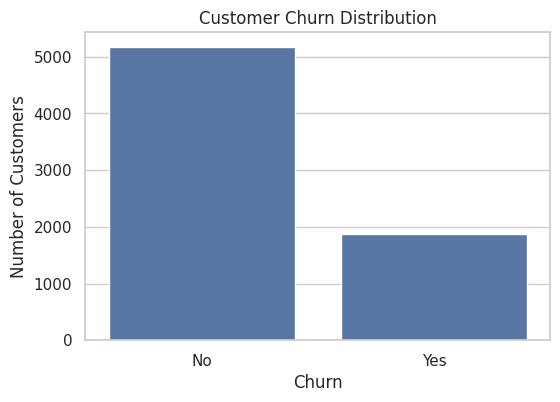

In [ ]:
# This plot shows how many customers churned vs did not churn
# It helps us understand the overall churn situation in the dataset

plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=clean)

# Adding title and labels for clarity
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')

plt.show()


**Observation:**
- Majority of customers did not churn.
- A significant portion churned, making churn analysis meaningful.

- This indicates that customer churn is a significant business issue and requires further investigation




##### **5.3.2 Tenure Distribution**

- This plot shows how long customers stay with the company.

- Tenure is measured in months and helps identify early-stage churn behavior.

- Understanding tenure distribution is important because customers with shorter tenure are often more likely to churn.

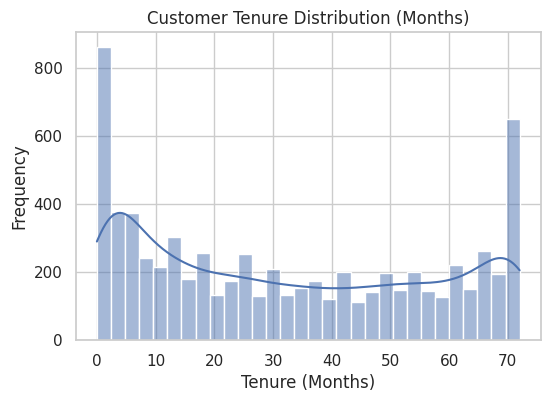

In [ ]:
# This histogram shows how long customers stay with the company
# Tenure is measured in months

plt.figure(figsize=(6,4))
sns.histplot(clean['tenure'], bins=30, kde=True)

plt.title('Customer Tenure Distribution (Months)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')

plt.show()


**Observation:**
- Many customers have short tenure.

- Fewer customers stay for very long durations.

- Early-stage churn risk appears high.


##### **5.3.3 Monthly Charges Distribution**

- This visualization displays the distribution of monthly charges paid by customers.

- Monthly charges represent the amount billed to customers every month for telecom services.

- It helps analyze pricing spread across customer segments.

- Since monthly charges are continuous numerical values, a histogram is used to visualize their distribution.

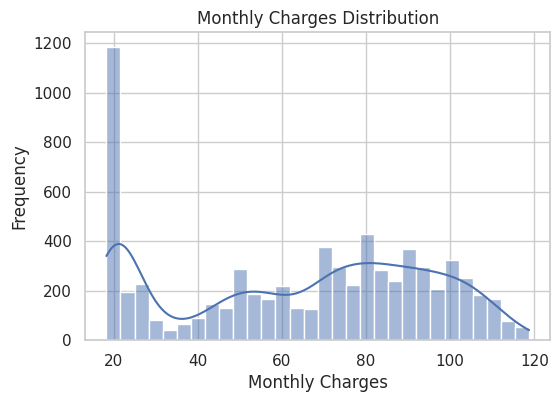

In [ ]:
# This plot shows the distribution of monthly charges paid by customers
# It helps identify low-cost and high-cost customer segments

plt.figure(figsize=(6,4))
sns.histplot(clean['monthlycharges'], bins=30, kde=True)

plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')

plt.show()


**Observation:**
- Monthly charges vary widely.
- A large number of customers fall into the lower monthly charge range
- Both low-cost and high-cost plans are common.
- Monthly charges vary significantly across customers, indicating multiple pricing tiers.


#### **5.4 Bivariate Analysis**

- Bivariate analysis examines the relationship between two variables to understand how one variable influences another.

- Here it is used to study how different customer attributes affect churn behavior.

##### **5.4.1 Churn vs Contract Type**

- This analysis examines how contract type affects customer churn.

- Contract type represents the commitment level of customers, such as month-to-month, one-year, or two-year contracts.

- By comparing churn across contract types, we can identify which contract durations are associated with higher churn risk.

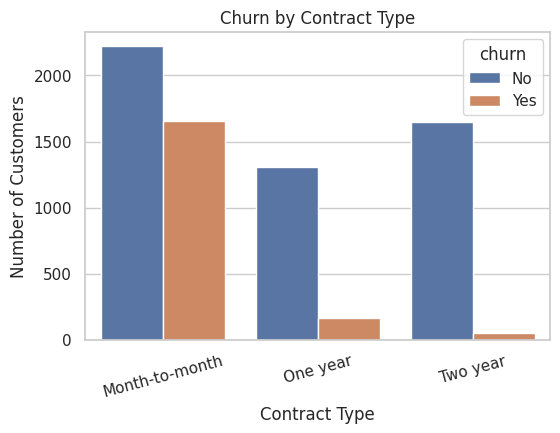

In [ ]:
# This plot compares churn across different contract types
# Contract type indicates the commitment level of customers

plt.figure(figsize=(6,4))
sns.countplot(x='contract', hue='churn', data=clean)

plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=15)

plt.show()


**Observation:**
- Month-to-month contracts have the highest churn.
- Long-term contracts retain customers better.
- Customers with longer contracts are less likely to leave due to switching costs

##### **5.4.2 Churn vs Monthly Charges**

- This boxplot compares monthly charges between churned and retained customers.

- It helps identify whether higher monthly charges are associated with an increased likelihood of churn.

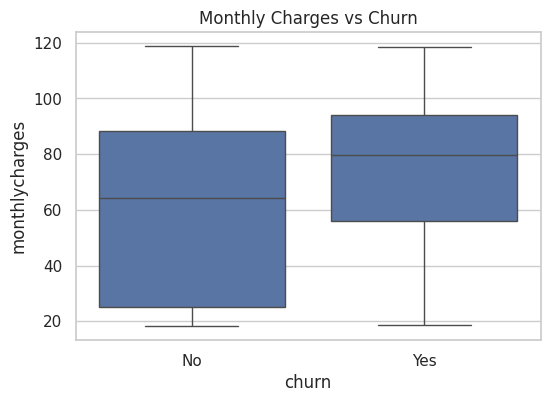

In [ ]:
# Boxplot compares monthly charges between churned and non-churned customers
# Helps check if higher charges lead to churn

plt.figure(figsize=(6,4))
sns.boxplot(x='churn', y='monthlycharges', data=clean)

plt.title('Monthly Charges vs Churn')

plt.show()


**Observation:**
- Customers with higher monthly charges are more likely to churn.

Churn = No (Stayed customers)

- Lower median monthly charge

- More stable billing

- Customers pay comparatively less

Churn = Yes (Churned customers)

- Higher median monthly charge

- Wider spread

- Customers tend to pay more


#### **5.4.3 Churn vs Tenure**

- This analysis compares tenure between churned and non-churned customers.

- This chart compares customer tenure between two groups:

   Churn = No → Customers who stayed

   Churn = Yes → Customers who left

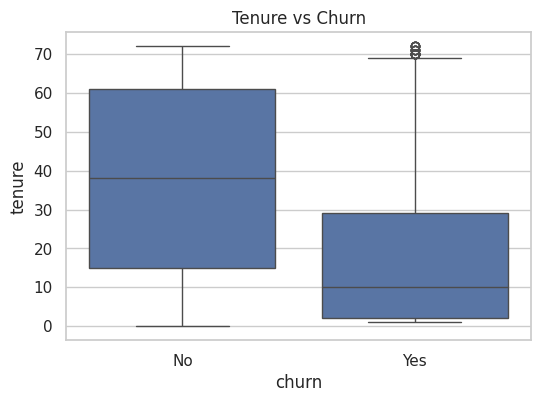

In [ ]:
# This boxplot compares tenure for churned vs retained customers
# Helps understand customer loyalty behavior

plt.figure(figsize=(6,4))
sns.boxplot(x='churn', y='tenure', data=clean)

plt.title('Tenure vs Churn')

plt.show()


**Observation:**
- Customers with low tenure are more likely to churn.

Churn = No (Customers who stayed)

- Higher median tenure
- Many customers stayed for a long time
- Indicates strong loyalty

Churn = Yes (Customers who left)

- Lower median tenure

- Most churn happens early

- Customers leave within fewer months


##### **5.4.4 Churn vs Payment Method**

- This analysis examines how different payment methods are associated with customer churn.

- The goal is to understand whether the way customers pay their bills influences their likelihood of leaving the telecom service.

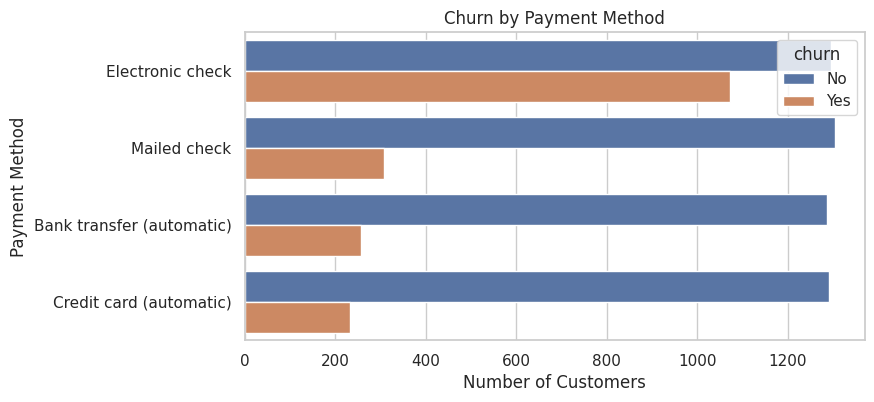

In [ ]:
# This plot shows churn distribution across different payment methods
# Payment methods indicate convenience and automation

plt.figure(figsize=(8,4))
sns.countplot(y='paymentmethod', hue='churn', data=clean)

plt.title('Churn by Payment Method')
plt.xlabel('Number of Customers')
plt.ylabel('Payment Method')

plt.show()


**Observation:**
- Less automated payment methods show higher churn.
- Customers using Electronic Check show the highest churn
- Customers using automatic payment methods (credit card or bank transfer) have lower churn
- Mailed check users fall somewhere in between


#### **5.5 Multivariate Analysis**

- Multivariate analysis involves analyzing more than two variables simultaneously to understand how multiple factors together influence an outcome.

- Here it is used to examine how customer churn is influenced by a combination of:

      Service usage

      Customer behavior

      Subscription patterns

##### **5.5.1 Churn vs Number of Subscribed Services**

This analysis evaluates how the number of subscribed services influences churn.

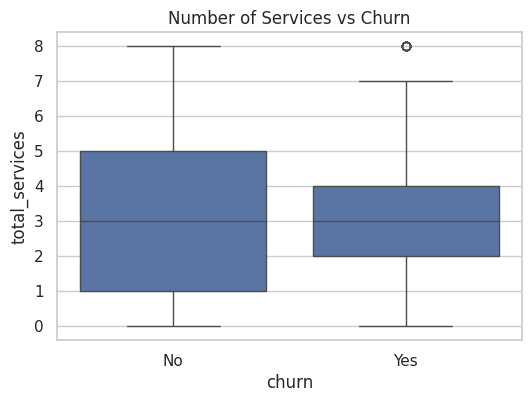

In [ ]:
# This boxplot shows how number of services affects churn
# Customers with more services are more engaged

plt.figure(figsize=(6,4))
sns.boxplot(x='churn', y='total_services', data=clean)

plt.title('Number of Services vs Churn')

plt.show()


**Observation:**
- Customers with more subscribed services churn less.

Customers who did NOT churn (No)

- Higher median number of services
- Wider range of services
- Many customers use 3–5 services

Customers who churned (Yes)

- Lower median number of services

- Most customers use 1–2 services

- Fewer highly engaged customers


##### **5.5.2 Correlation Analysis**

- A correlation heatmap is used to identify relationships between numerical variables and churn.

- It tells us how one variable changes when another changes

- Correlation values range from -1 to +1


**Why do we use a correlation heatmap here?**

A correlation heatmap visually shows relationships between multiple numerical variables at once, making it easier to:

- Identify strong predictors of churn
- Understand interdependencies between features
- Support business insights with statistics.



**Variables used in this heatmap**

The heatmap includes the following numerical features:

- `tenure` – Number of months the customer stayed

- `monthlycharges` – Monthly billing amount

- `totalcharges` – Total amount paid by the customer

- `total_services` – Number of services subscribed

- `churn_flag` – Binary churn indicator (1 = churned, 0 = stayed)

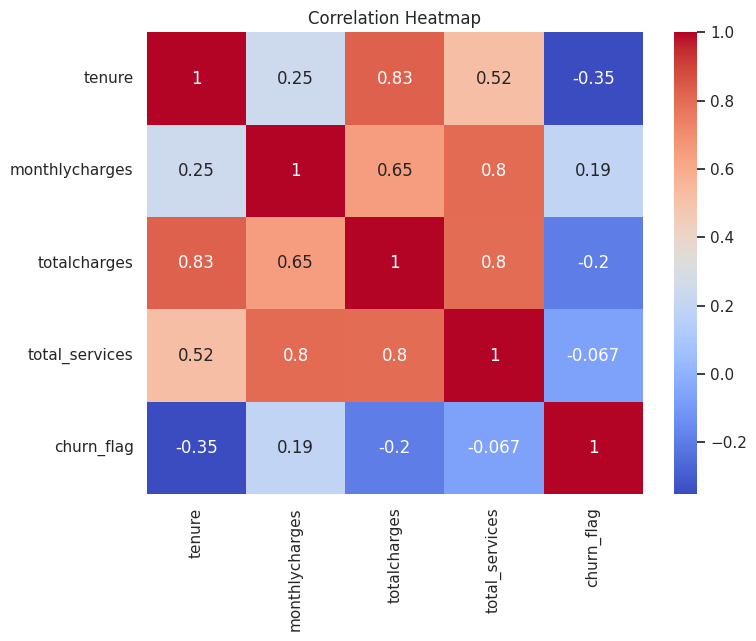

In [ ]:
# Correlation heatmap shows relationships between numeric variables
# Helps identify strong predictors of churn

plt.figure(figsize=(8,6))
sns.heatmap(
    clean[['tenure','monthlycharges','totalcharges','total_services','churn_flag']].corr(),
    annot=True,
    cmap='coolwarm'
)

plt.title('Correlation Heatmap')

plt.show()


**Observation:**
- Show the correlation value

  Range: -1 to +1

Value	Meaning:

     +1 - Strong positive relationship

     0 - No relationship
     
     1 - Strong negative relationship
- Tenure negatively correlates with churn.
- Monthly charges show a positive relationship with churn.


##### **5.5.3 Churn by Internet Service Type**

- This analysis examines how customer churn varies across different internet service types offered by the telecom company.

- The goal is to understand whether certain internet services are associated with higher churn.

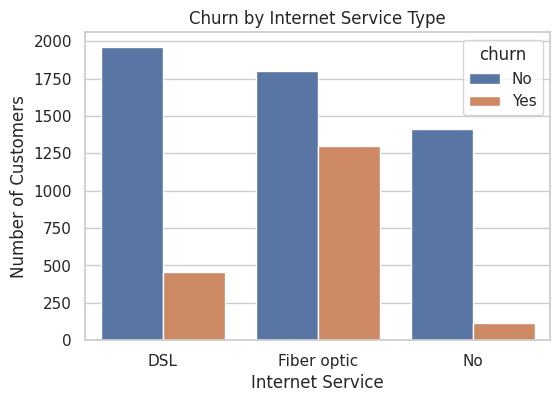

In [ ]:
# This plot compares churn across internet service types
# Different services have different pricing and experience

plt.figure(figsize=(6,4))

# Using correct column name after cleaning
sns.countplot(x='internetservice', hue='churn', data=clean)

plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Number of Customers')

plt.show()



**Observation:**
- Fiber optic users have higher churn compared to DSL users.
- Show higher churn compared to DSL
- Likely due to higher pricing or service expectations



#### **EDA Summary**

1) The dataset shows an imbalance between churned and non-churned customers, with the majority of customers remaining with the service.

2) Customer churn is highest during the early months of subscription, indicating that new customers are more likely to leave.

3) Customers with longer tenure demonstrate significantly lower churn, highlighting the importance of customer retention over time.

4) Higher monthly charges are associated with higher churn rates, suggesting price sensitivity among customers.

5) Customers on month-to-month contracts experience the highest churn, while long-term contracts (one-year and two-year) reduce churn considerably.

6) Payment method influences churn behavior; customers using electronic checks churn more frequently compared to those using automatic payment methods.

7) Customers subscribed to multiple services are less likely to churn, indicating that higher service engagement improves retention.

8) Fiber optic internet users exhibit higher churn compared to DSL and non-internet users, possibly due to higher costs or service expectations.

9) Correlation analysis confirms that churn has a negative relationship with tenure and number of services, and a positive relationship with monthly charges.

10) Overall, customer engagement, pricing, contract duration, and service usage patterns are key factors influencing churn.

## **TASK 4: Documentation, Insights & Presentation**

### **6. Insights, Recommendations & Conclusion**




#### **6.1 Introduction to Insight**s

This section summarizes the key insights derived from the exploratory data analysis and translates them into actionable business recommendations. The insights are based on observed patterns and relationships identified during EDA.

#### **6.2 Key Insights**

##### **6.2.1 Contract Type is a Strong Churn Driver**

Customers on month-to-month contracts show significantly higher churn compared to customers on one-year or two-year contracts. Long-term contracts are associated with better customer retention.

##### **6.2.2 Pricing Sensitivity Impacts Customer Retention**

Customers with higher monthly charges are more likely to churn, indicating price sensitivity among certain customer segments.

##### **6.2.3 Customer Tenure is Inversely Related to Churn**

Customers with shorter tenure are more likely to churn, while long-tenure customers tend to remain loyal. Early-stage churn represents a major risk area.

##### **6.2.4 Payment Method Influences Churn Behavior**

Customers using electronic check as a payment method exhibit higher churn compared to customers using automated payment methods such as credit cards or bank transfers.

##### **6.2.5 Service Bundling Reduces Churn**

Customers who subscribe to multiple services are less likely to churn. Increased service engagement strengthens customer dependency on the provider.



#### **6.3 Business Recommendations**

Based on the insights derived from the analysis, the following recommendations are proposed:

##### **6.3.1 Promote Long-Term Contracts**

Encourage customers to switch from month-to-month contracts to long-term contracts by offering discounts, loyalty rewards, or bundled offers.

##### **6.3.2 Optimize Pricing Strategies**

Review pricing structures for high-cost plans and introduce flexible pricing options or value-added bundles to reduce churn among price-sensitive customers.

##### **6.3.3 Focus on Early-Tenure Customers**

Implement targeted onboarding programs, proactive customer support, and engagement initiatives during the initial months of a customer’s tenure.

##### **6.3.4 Encourage Automated Payment Methods**

Promote automated payment options by offering incentives such as cashback, discounts, or simplified billing processes to reduce churn risk.

##### **6.3.5 Expand Service Bundling Opportunities**

Offer bundled service packages to increase customer engagement and reduce the likelihood of churn.


### **6.4 Conclusion**

This project successfully performed end-to-end data analytics on a telecom customer churn dataset. Through systematic data cleaning, feature engineering, and exploratory data analysis, key factors influencing customer churn were identified.

The insights and recommendations derived from this analysis can help telecom companies improve customer retention strategies, optimize pricing models, and enhance overall customer experience. This project demonstrates the effective application of data analytics techniques to solve real-world business problems.
